In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET

In [2]:
df=pd.read_csv("heart.csv")

# DATA SUMMARY

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

#age age in years
#sex (1 = male; 0 = female) 
#cp chest pain type 
#trestbps resting blood pressure (in mm Hg on admission to the hospital) 
#chol serum cholestoral in mg/dl 
#fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
#restecg resting electrocardiographic results 
#thalach maximum heart rate achieved 
#exang exercise induced angina (1 = yes; 0 = no) 
#oldpeak ST depression induced by exercise relative to rest 
#slope the slope of the peak exercise ST segment 
#ca number of major vessels (0-3) colored by flourosopy 
#thal 3 = normal; 6 = fixed defect; 7 = reversable defect 
#target 1 or 0 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

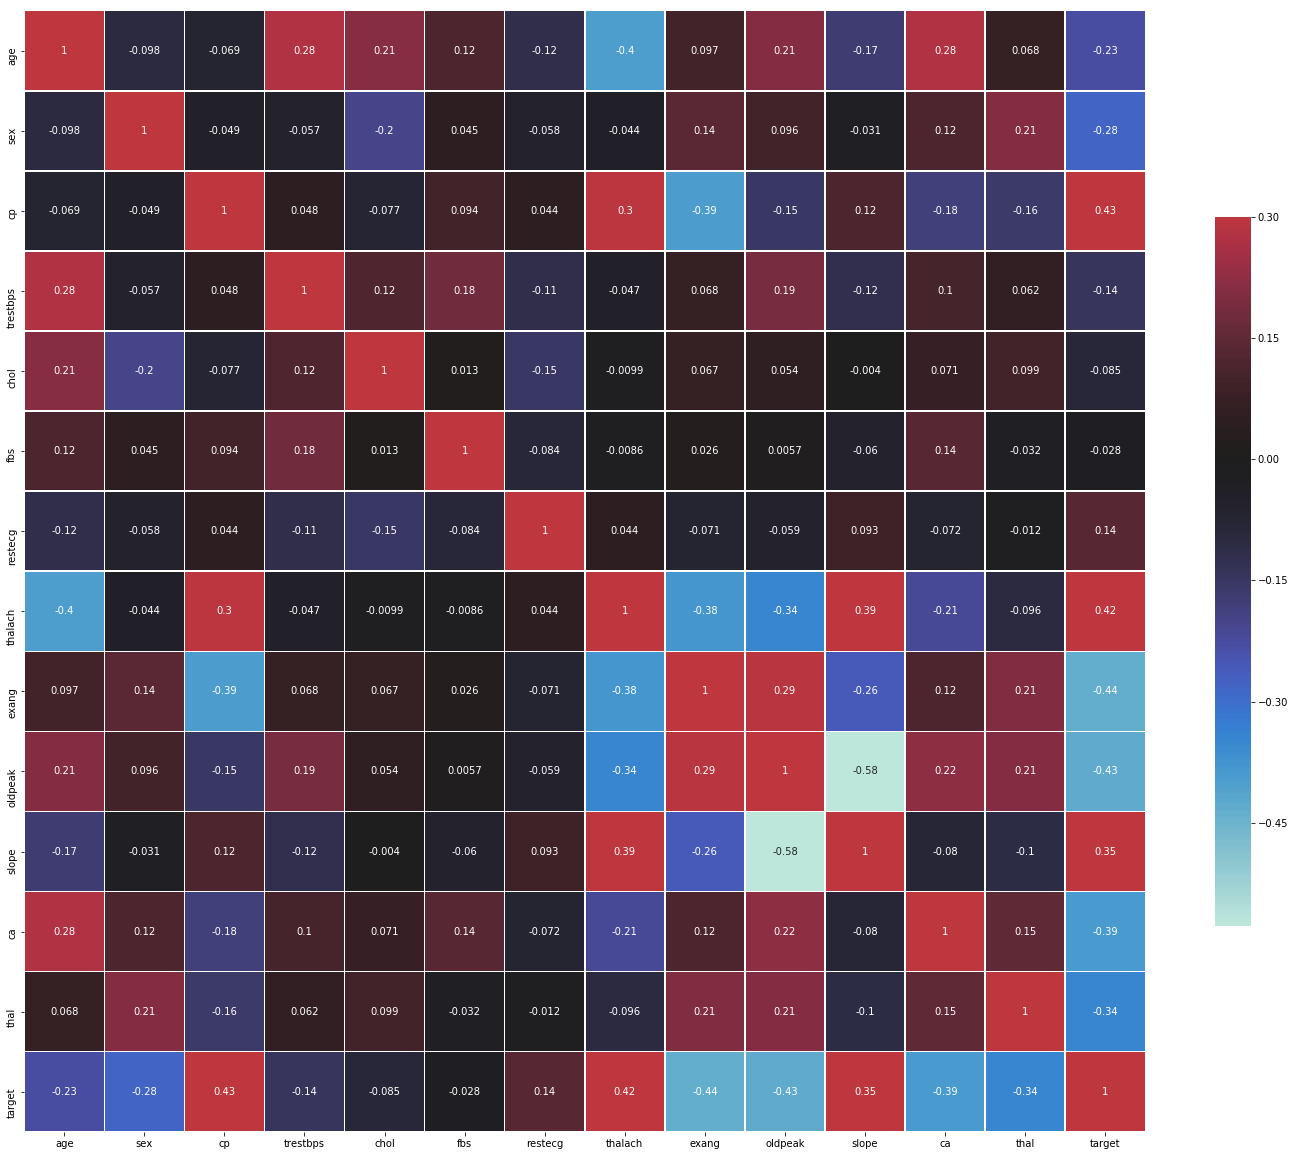

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True)
plt.tight_layout()
plt.show()

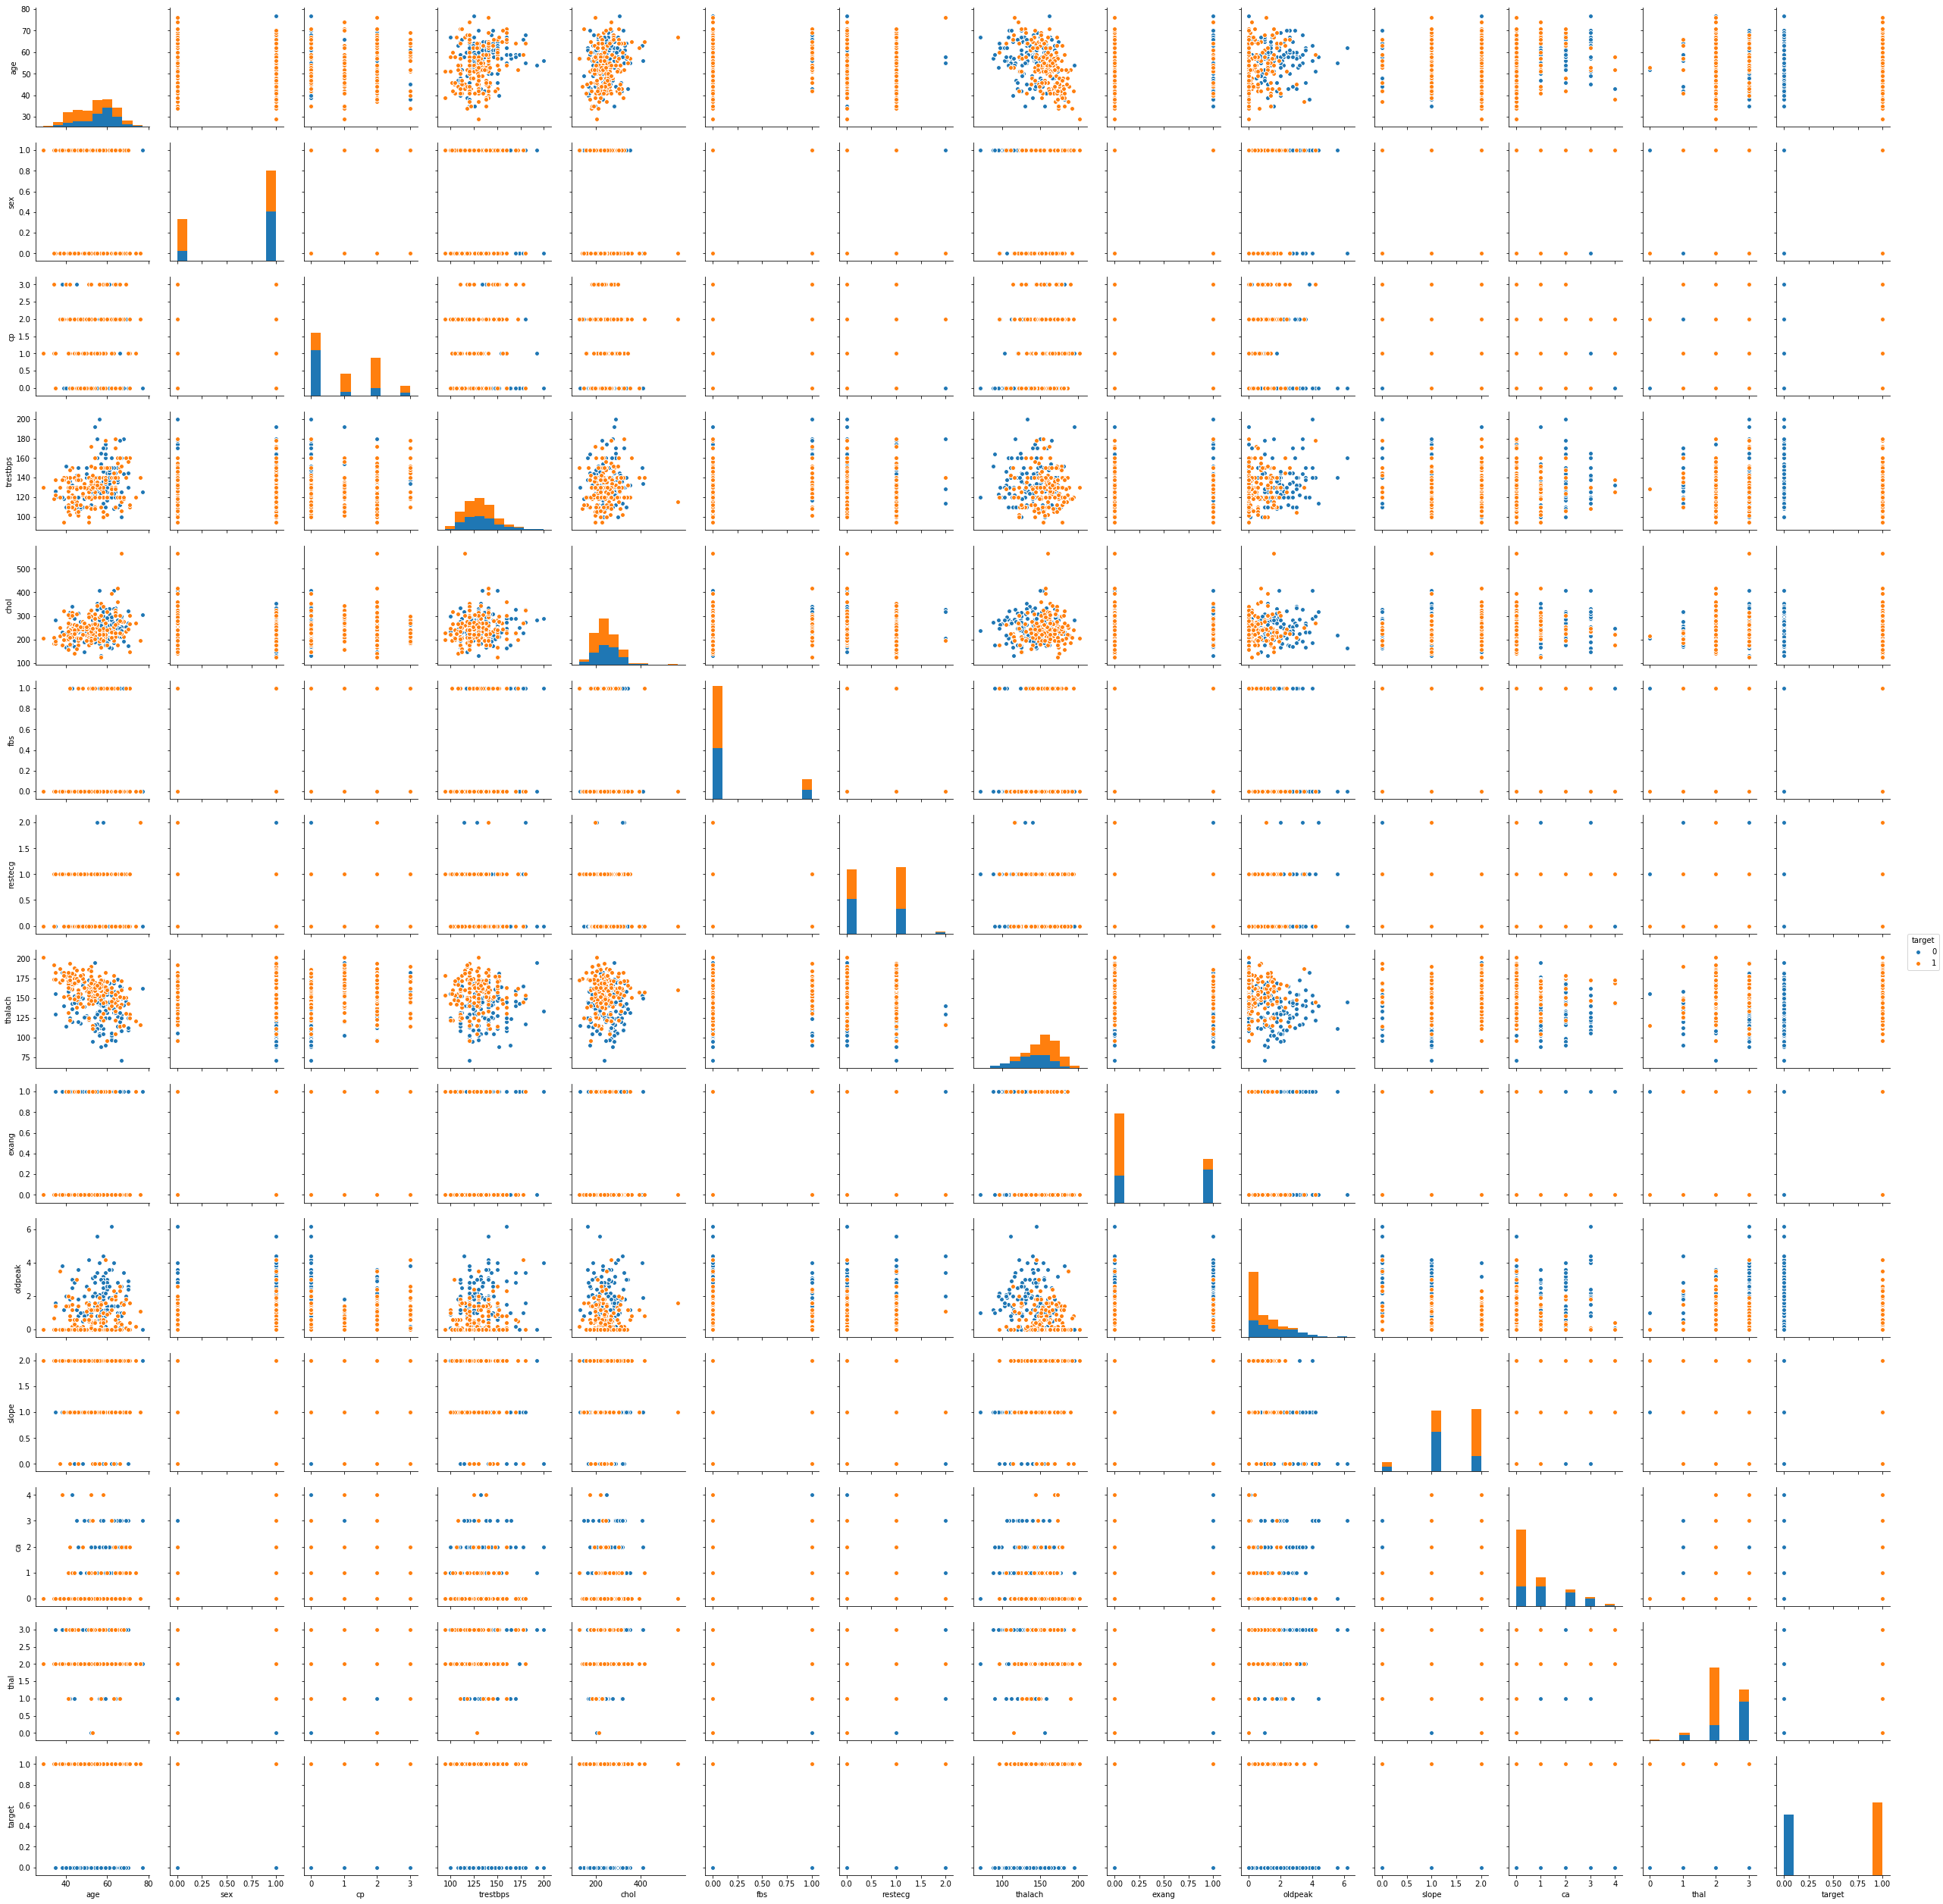

In [8]:
sns.pairplot(df,hue="target")
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# K-NN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))



212 91
212 91


0.7142857142857143 4


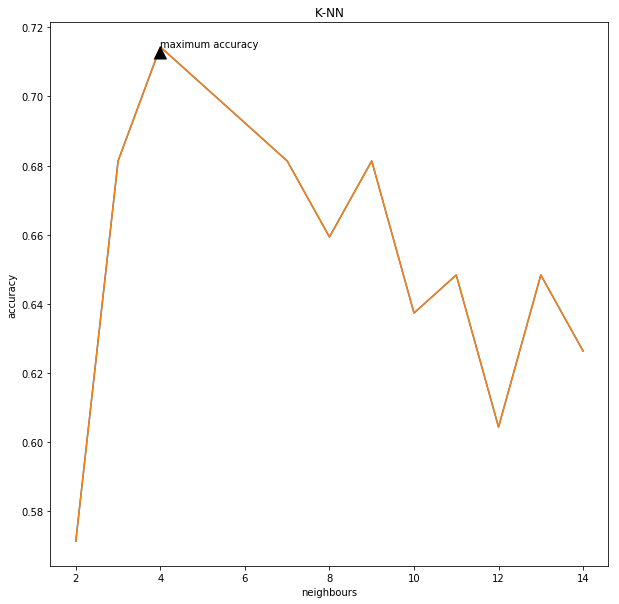

In [11]:
def neigh_test(n):
    neigh=KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train,y_train)
    return neigh.score(X_test,y_test)

n=[]
acc=[]
for i in  range(2,15):
    n.append(i)
    acc.append(neigh_test(i))

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
line,=ax.plot(n,acc)

ymax=max(acc)

xpos=acc.index(ymax)
xmax=n[xpos]
print(ymax,xmax)

ax.annotate('maximum accuracy',xy=(xmax,ymax),xytext=(xmax,ymax),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.plot(n,acc)
plt.title("K-NN")
plt.xlabel("neighbours")
plt.ylabel("accuracy")

plt.show()

# ---------------------------------------------------------------------------------------------------------------

# LOGISTIC REGRESSION WITH PCA

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

0.8461538461538461 9


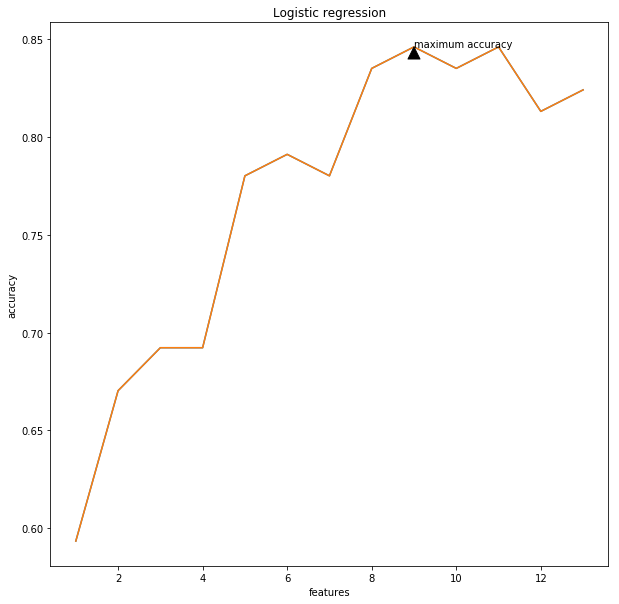

In [14]:


def pca_and_regression(n):
    pca=PCA(n_components=n)
    Xpca=X
    #print(len(Xpca))
    pca.fit(Xpca)
    #print(pca)
    Xpca=pca.fit_transform(Xpca)
    #print(Xpca)
    Xpca_train,Xpca_test,ypca_train,ypca_test=train_test_split(Xpca,y,test_size=0.3,random_state=50)
    #print(Xpca_train)
    clf=LogisticRegression(random_state=0,solver='lbfgs')
    clf.fit(Xpca_train,ypca_train)
    return clf.score(Xpca_test,ypca_test)
n=[i for i in range(1,14)]
acc=[]
for ele in n:
    acc.append(pca_and_regression(ele))
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
line,=ax.plot(n,acc)

ymax=max(acc)

xpos=acc.index(ymax)
xmax=n[xpos]
print(ymax,xmax)

ax.annotate('maximum accuracy',xy=(xmax,ymax),xytext=(xmax,ymax),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.plot(n,acc)
plt.title("Logistic regression")
plt.xlabel("features")
plt.ylabel("accuracy")

plt.show()

# ---------------------------------------------------------------------------------------------------------------

# DECISION TREE

In [15]:
from sklearn import tree

In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))


212 91
212 91


In [17]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
print("accuracy with decision trees ",clf.score(X_test,y_test))

accuracy with decision trees  0.7362637362637363


In [19]:
 import graphviz 
 

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("heart")

'heart.pdf'

In [21]:
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                      feature_names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"],  
#                      class_names=["0","1"],  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

# ---------------------------------------------------------------------------------------------------------------

# SVM

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
df=pd.read_csv("heart.csv")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)



In [23]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear',random_state = 0)

clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
print(y_pred_svm)
print(list(y_test))
print("accuracy ",clf.score(X_test,y_test))

[1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1]
[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]
accuracy  0.8131868131868132


# ---------------------------------------------------------------------------------------------------------------


# AdaBoost

In [24]:
import pandas as pd
df=pd.read_csv("heart.csv")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))


212 91
212 91


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt


In [26]:
kfold=model_selection.KFold(n_splits=10,random_state=7)
clf=AdaBoostClassifier(tree.DecisionTreeClassifier(criterion='entropy'),n_estimators=10,random_state=2)
clf.fit(X_train,y_train)
result=model_selection.cross_val_score(clf,X_train,y_train,cv=kfold)
print(result)

print(result.mean())

[0.72727273 0.86363636 0.85714286 0.71428571 0.71428571 0.80952381
 0.80952381 0.71428571 0.66666667 0.80952381]
0.7686147186147185


In [27]:
predicted=clf.predict(X_test)
print(metrics.accuracy_score(y_test,predicted))

0.7142857142857143
